In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#As the datatype of Total charges column is wrongly interpreted as object, we change it to float
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
#replacing null values with mean
df.TotalCharges.fillna(np.mean(df.TotalCharges), inplace = True)
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
#Dropping customer ID column
df.drop('customerID', axis = 1, inplace = True)

# EDA

In [12]:
#Churn column analysis
churned = df.Churn.value_counts()
churned

Churn
No     5174
Yes    1869
Name: count, dtype: int64

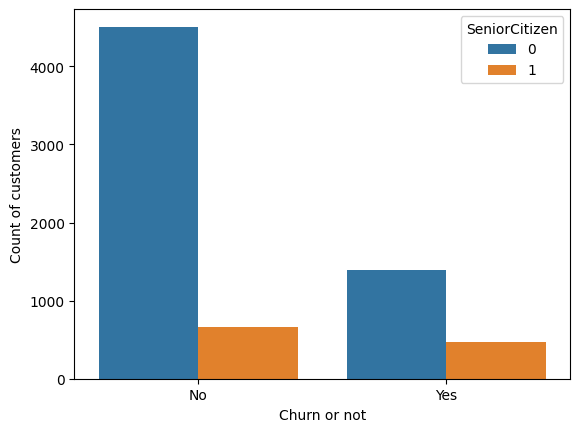

In [13]:
#Senior citizen impact on churn
sns.countplot(x='Churn', hue="SeniorCitizen",data=df)
plt.xlabel("Churn or not")
plt.ylabel('Count of customers')
plt.show()

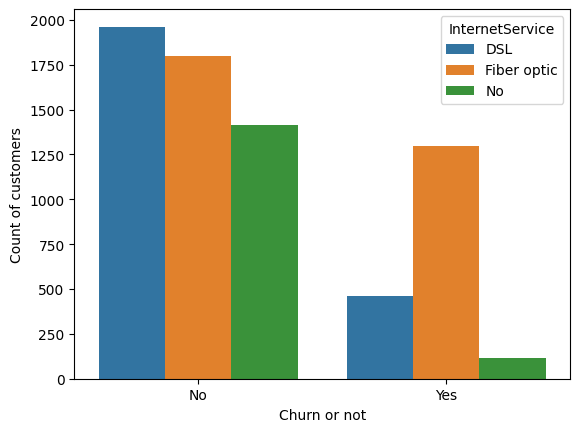

In [14]:
#Internet service impact on churn
sns.countplot(x='Churn', hue="InternetService",data=df)
plt.xlabel("Churn or not")
plt.ylabel('Count of customers')
plt.show()

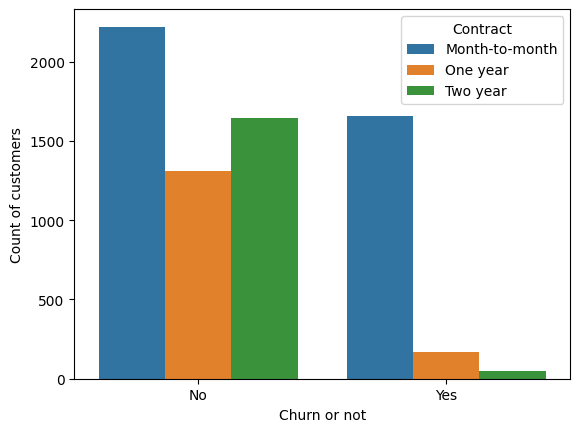

In [15]:
#Contract impact on churn
sns.countplot(x='Churn', hue="Contract",data=df)
plt.xlabel("Churn or not")
plt.ylabel('Count of customers')
plt.show()

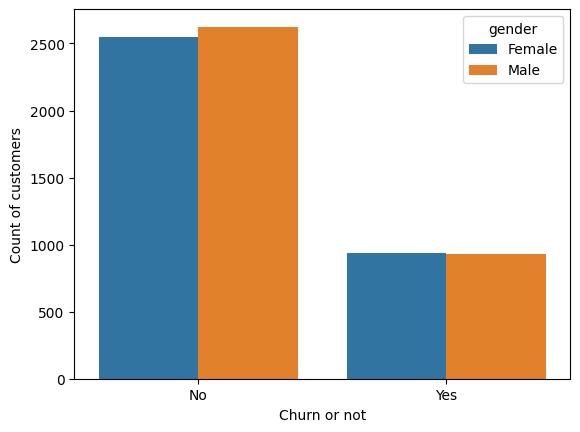

In [16]:
#Gender impact on churn
sns.countplot(x='Churn', hue="gender",data=df)
plt.xlabel("Churn or not")
plt.ylabel('Count of customers')
plt.show()

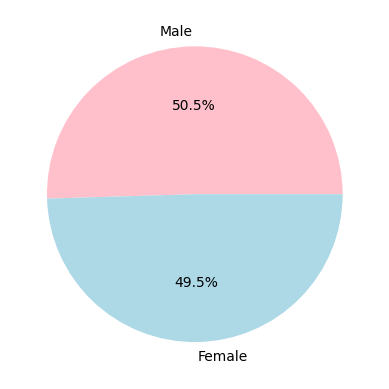

In [17]:
gender_count = df.gender.value_counts()
plt.pie(gender_count.values, labels=gender_count.index, autopct='%0.1f%%', colors = ['Pink','Lightblue'])
plt.show()

In [18]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
gen_labels = ['Male','Female']
churn_labs = ['No Churn','Churned']

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(labels = gen_labels, values = df['gender'].value_counts(),name = 'Gender'),
             1,1)

fig.add_trace(go.Pie(labels=churn_labs, values = df['Churn'].value_counts(), name = 'Churn'),
             1,2)
plt.show()

#Converting above pie chart into doughnut chart
fig.update_traces(hole = .5, hoverinfo = 'label+percent+name', textfont_size = 16)

fig.update_layout(title_text = 'Gender Vs Churn Distribution', 
                  annotations = [dict(text='Gender',x=0.16, y=0.5, font_size = 20, showarrow = False),
                               dict(text = 'Churn', x=0.84, y=0.5, font_size = 20, showarrow = False)])

fig.show()

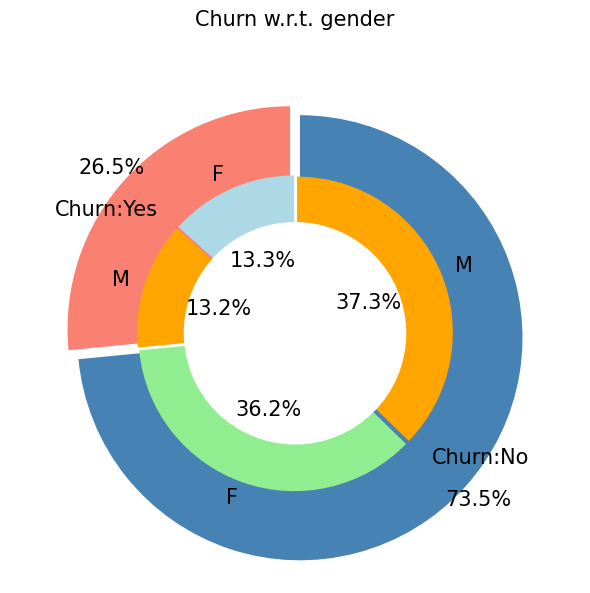

In [19]:
plt.figure(figsize=(6,6))
labels = ['Churn:Yes','Churn:No']
values = [1869,5174]
gen_lab = ['F','M','F','M']
gen_count = [939,930,2549,2625]
colors = ['Salmon','Steelblue']
color_gen = ['LightBlue','Orange','Lightgreen','Orange']
explode = (0.3,0.3)
explod_gen = [0.1,0.1,0.1,0.1]
textprop = {'fontsize':15}

#Plot Pie charts
plt.pie(values,labels=labels,autopct="%1.1f%%", pctdistance=1.08,
       labeldistance=0.8, colors = colors,startangle=90, frame=True,
       explode=explode, radius=10, textprops=textprop)

plt.pie(gen_count, labels=gen_lab, autopct="%1.1f%%", pctdistance=0.5,
       colors=color_gen, startangle=90, explode=explod_gen, radius=7, textprops=textprop)

centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth = 0)
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Churn w.r.t. gender", fontsize=15, y=1.1)

plt.axis('equal')
plt.tight_layout()
plt.show()

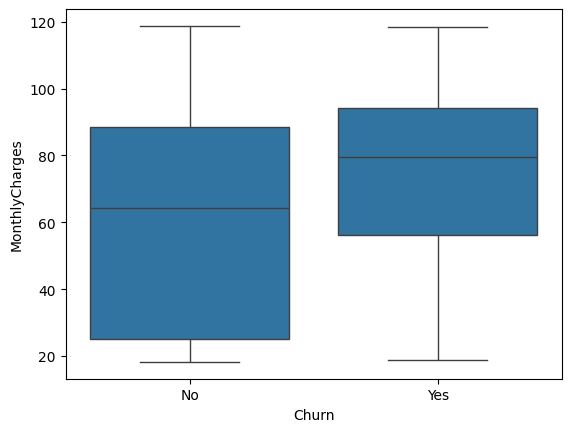

In [20]:
#Montly charges distribution usign box plot for churn and not churn
sns.boxplot(x = 'Churn', y='MonthlyCharges', data=df)
plt.show()

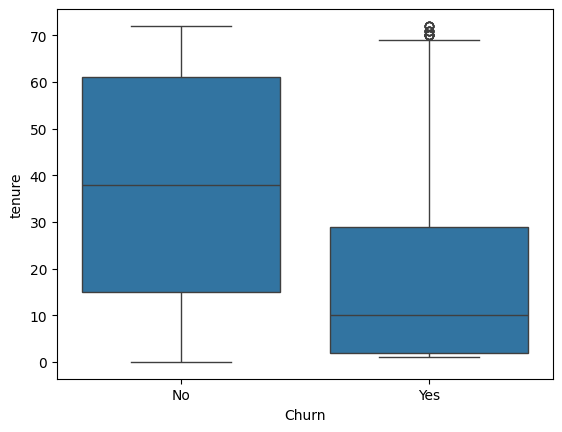

In [21]:
sns.boxplot(x = 'Churn', y='tenure', data=df)
plt.show()

Text(0.5, 1.0, 'Distribution of Tenure')

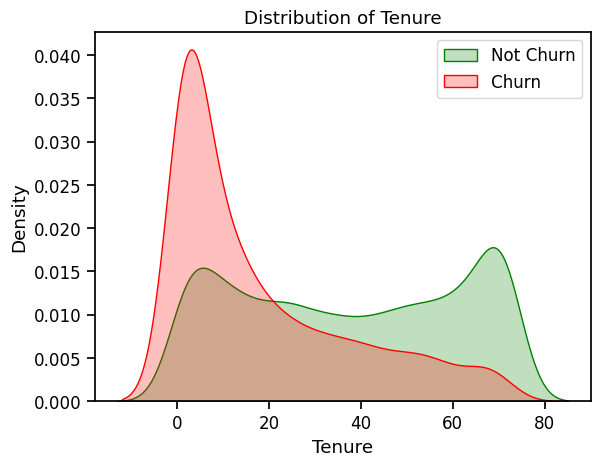

In [22]:
sns.set_context('notebook', font_scale=1.1)
ax = sns.kdeplot(df.tenure[(df['Churn']=='No')], color = 'Green', shade=True);

ax = sns.kdeplot(df.tenure[(df['Churn'] =='Yes')], color = 'Red', shade=True);

ax.legend(['Not Churn','Churn'], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Tenure')
ax.set_title('Distribution of Tenure')

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
def encode_cols(column):
    if column.dtype == 'object':
        column = LabelEncoder().fit_transform(column)
    return column

In [25]:
df = df.apply(lambda x:encode_cols(x))

In [26]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1
